In [ ]:
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.2 MB/s 
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 132 kB 56.8 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 192 kB 59.4 MB/s 
     |████████████████████████████████| 133 kB 38.4 MB/s 
     |████████████████████████████████| 37.8 MB 90 kB/s 
     |████████████████████████████████| 79.9 MB 137 kB/s 
     |████████████████████████████████| 108 kB 64.1 MB/s 
     |████████████████████████████████| 564 kB 47.1 MB/s 
     |████████████████████████████████| 226 kB 65.2 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 202 kB 64.9 MB/s 
     |████████████████████████████████| 58 

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision
from fiftyone.core.dataset import Dataset
from PIL import Image
from torchvision.transforms import functional as func
from fiftyone import ViewField as F

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


# Loading Coco dataset 2017, validation split

In [ ]:
dataset = foz.load_zoo_dataset("coco-2017", split="validation")

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 761.3Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 761.3Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [8.1s elapsed, 0s remaining, 793.7Mb/s]       


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [8.1s elapsed, 0s remaining, 793.7Mb/s]       


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [46.2s elapsed, 0s remaining, 112.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [46.2s elapsed, 0s remaining, 112.1 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


# Launching fiftyone app

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


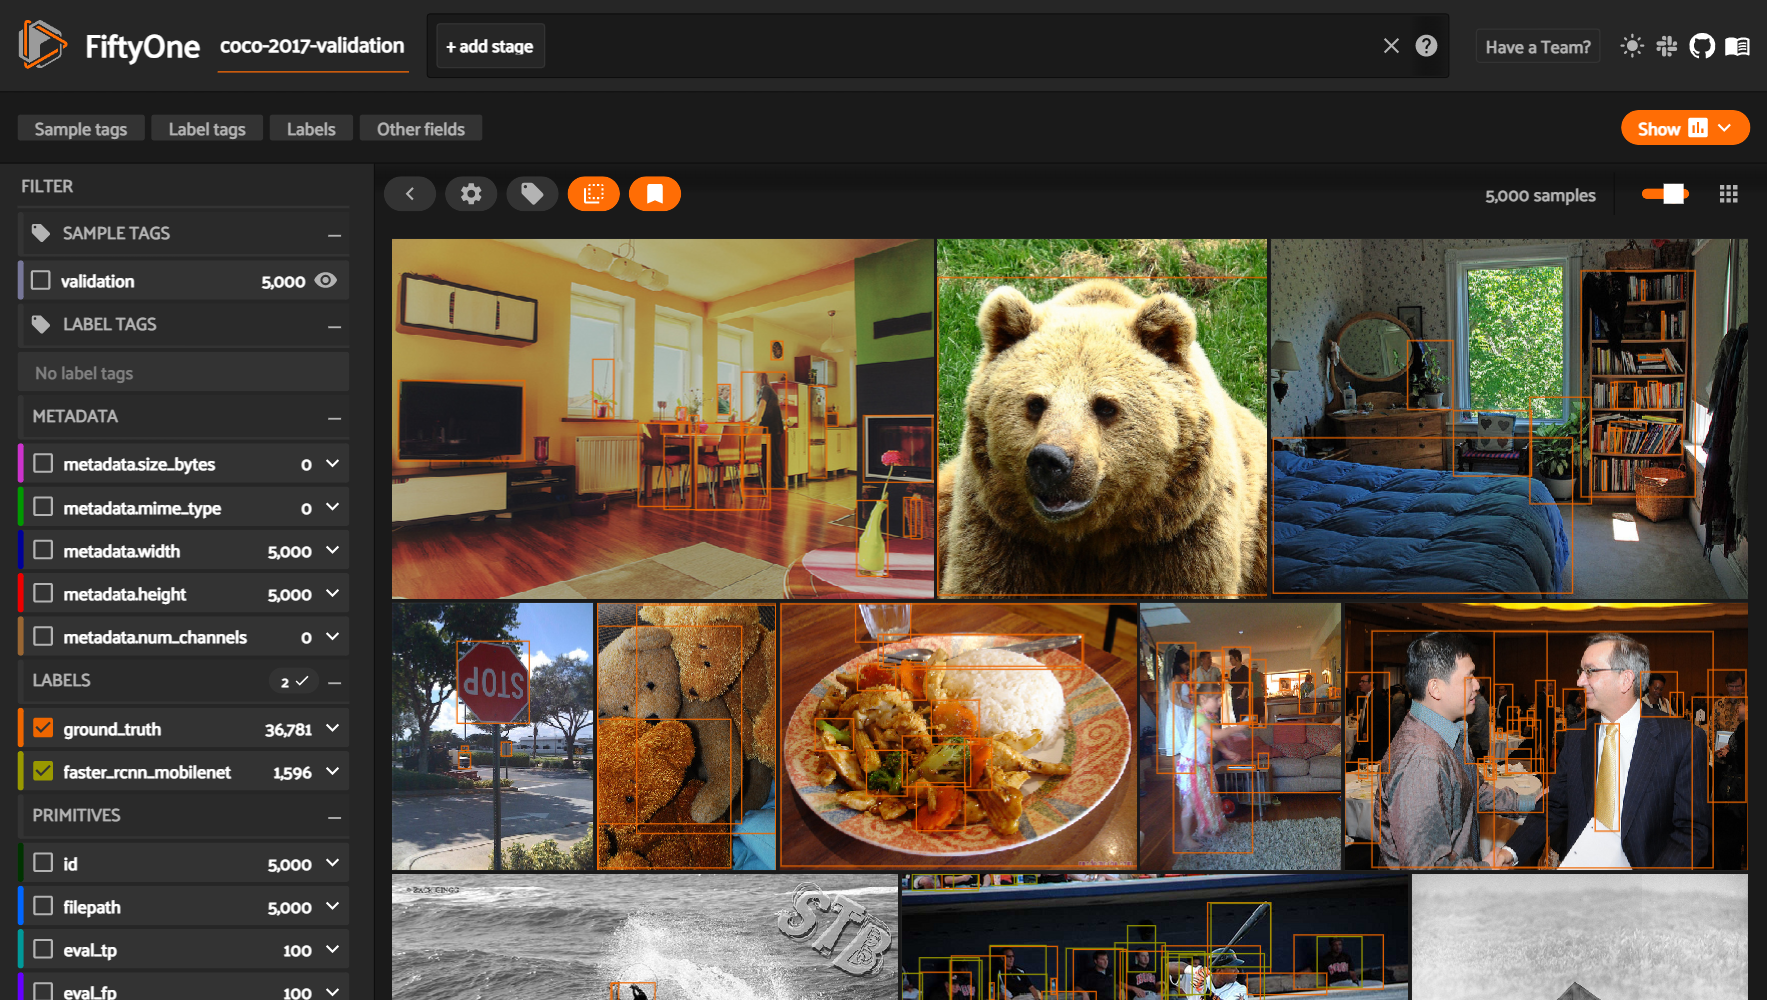

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(dataset)

In [ ]:
session.freeze()  # screenshot the active App for sharing

# Information about the dataset

In [ ]:
print(dataset)

Name:        coco-2017-validation
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        []
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField


In [ ]:
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '63a45b63af256b54b23e1c9e',
    'attributes': {},
    'tags': [],
    'label': 'potted plant',
    'bounding_box': [
        0.37028125,
        0.3345305164319249,
        0.038593749999999996,
        0.16314553990610328,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'furniture',
    'iscrowd': 0,
    'eval': 'fn',
    'eval_id': '',
}>


# Model 2

# Faster_RCNN_Mobilenet

In [ ]:
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
model.eval()

print("Model ready")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth


  0%|          | 0.00/74.2M [00:00<?, ?B/s]

Model ready


In [ ]:
predictions_view = dataset.take(5000, seed=51)

In [ ]:
# Get class list
classes2 = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes2[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn_mobilenet"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████| 5000/5000 [22.3m elapsed, 0s remaining, 3.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [22.3m elapsed, 0s remaining, 3.8 samples/s]      


Finished adding predictions


In [ ]:
results = predictions_view.evaluate_detections(
    "faster_rcnn_mobilenet",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [4.6m elapsed, 0s remaining, 17.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [4.6m elapsed, 0s remaining, 17.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [2.6m elapsed, 0s remaining, 34.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.6m elapsed, 0s remaining, 34.3 samples/s]      


# IoU visible on images

Dataset:     coco-2017-validation
Media type:  image
Num patches: 87490
Patch fields:
    id:                    fiftyone.core.fields.ObjectIdField
    sample_id:             fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:                 fiftyone.core.fields.BooleanField
    type:                  fiftyone.core.fields.StringField
    iou:                   fiftyone.core.fields.FloatField
View stages:
    1. Take(size=5000, seed=51)
    2. ToEvaluationPatches(eval_key='eval', config=None)
{'fn': 19338, 'fp': 50709, 'tp': 17443}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


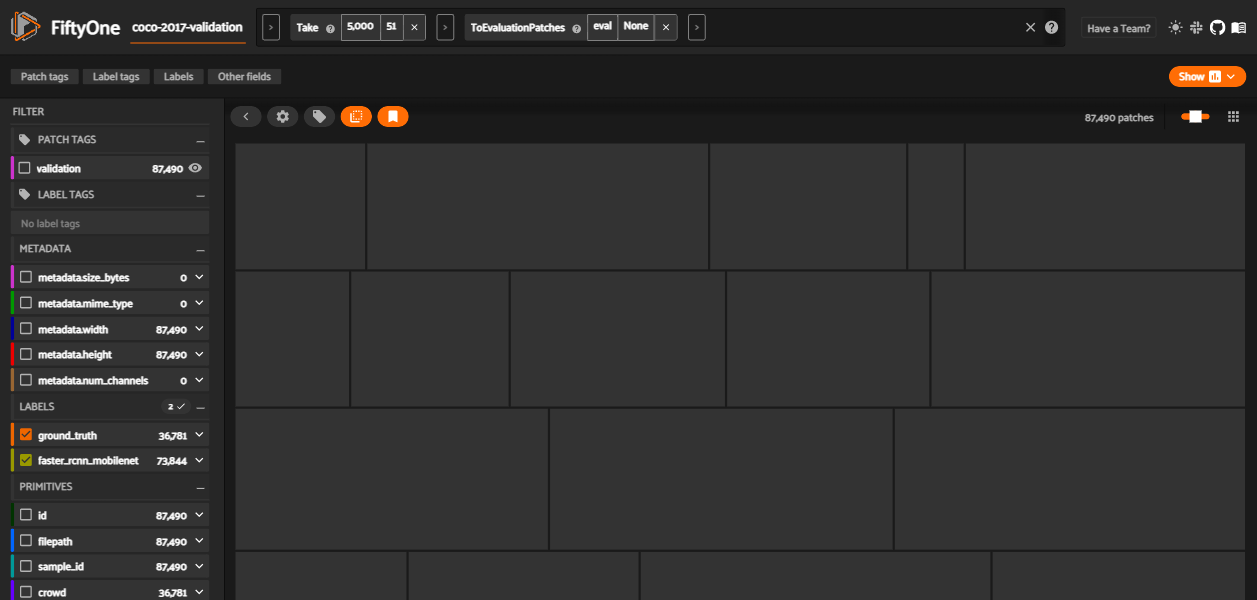

<IPython.core.display.Javascript object>

In [ ]:
eval_patches = predictions_view.to_evaluation_patches("eval")
print(eval_patches)

print(eval_patches.count_values("type"))

session.view = eval_patches

In [ ]:
session.freeze()  # screenshot the active App for sharing

# mAP of this model

In [ ]:
print(results.mAP())

0.22744898884151493


# Getting the 10 most common classes

In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

               precision    recall  f1-score   support

       person       0.47      0.68      0.55     14397
          car       0.21      0.44      0.28      2120
        chair       0.21      0.39      0.27      1893
         book       0.35      0.46      0.40      1711
       bottle       0.17      0.34      0.23      1116
          cup       0.17      0.35      0.23       919
 dining table       0.23      0.53      0.32       698
traffic light       0.11      0.21      0.15       637
         bowl       0.21      0.50      0.29       644
      handbag       0.08      0.13      0.10       540

    micro avg       0.34      0.56      0.42     24675
    macro avg       0.22      0.40      0.28     24675
 weighted avg       0.36      0.56      0.44     24675



# Precision vs. recall of th 10 most common classes

In [ ]:
plot = results.plot_pr_curves(classes=classes_top10)
plot.show()

# Confusion matrix for the 10 most common classes

In [ ]:
plot = results.plot_confusion_matrix(classes=classes_top10)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Printing a classification report for all 80 classes

In [ ]:
counts = dataset.count_values("ground_truth.detections.label")
classes_80 = sorted(counts, key=counts.get, reverse=True)[:80]

results.print_report(classes=classes_80)

                precision    recall  f1-score   support

        person       0.47      0.68      0.55     14397
           car       0.21      0.44      0.28      2120
         chair       0.21      0.39      0.27      1893
          book       0.35      0.46      0.40      1711
        bottle       0.17      0.34      0.23      1116
           cup       0.17      0.35      0.23       919
  dining table       0.23      0.53      0.32       698
 traffic light       0.11      0.21      0.15       637
          bowl       0.21      0.50      0.29       644
       handbag       0.08      0.13      0.10       540
          bird       0.37      0.53      0.44       629
          boat       0.22      0.41      0.28       485
         truck       0.18      0.51      0.27       415
         bench       0.15      0.31      0.20       413
      umbrella       0.35      0.53      0.42       455
           cow       0.39      0.67      0.49       501
        banana       0.35      0.55      0.42  

# Confusion matrix for all the 80 classes

In [ ]:
plot = results.plot_confusion_matrix(classes=classes_80)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Success cases

In [ ]:
# Only contains detections with confidence >= 0.75
success_view = predictions_view.filter_labels("faster_rcnn_mobilenet", F("confidence") > 0.75, only_matches=False)

In [ ]:
# Print some information about the view
print(success_view)

Dataset:     coco-2017-validation
Media type:  image
Num samples: 5000
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5000, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


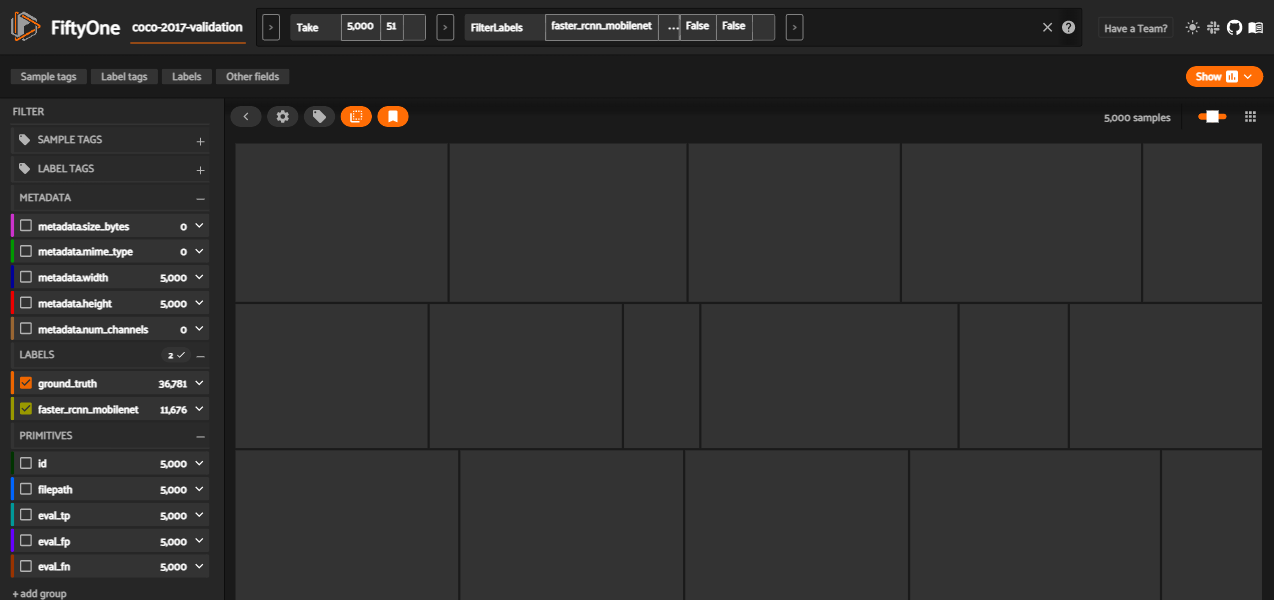

<IPython.core.display.Javascript object>

In [ ]:
session.view = success_view

# Failure cases

In [ ]:
session.freeze()  # screenshot the active App for sharing

In [ ]:
# Only contains detections with confidence <= 0.3
failure_view = predictions_view.filter_labels("faster_rcnn_mobilenet", F("confidence") <= 0.3, only_matches=False)

In [ ]:
# Print some information about the view
print(failure_view)

Dataset:     coco-2017-validation
Media type:  image
Num samples: 5000
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5000, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$lte': ['$$this.confidence', 0.3]}, only_matches=False, trajectories=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


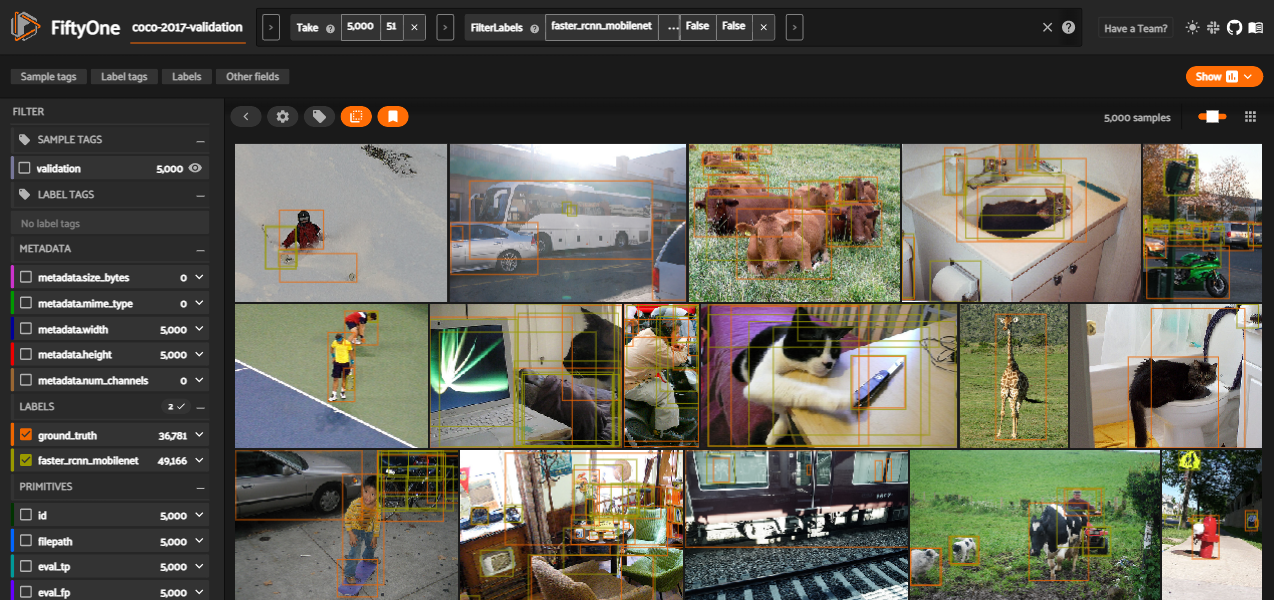

<IPython.core.display.Javascript object>

In [ ]:
session.view = failure_view

In [ ]:
session.freeze()  # screenshot the active App for sharing

# Working with another dataset to test generalisation

# Loading VOC 2012 dataset, validation split

In [ ]:
dataset_voc2012 = foz.load_zoo_dataset("voc-2012", split="validation")

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/voc-2012/validation'


  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting /root/fiftyone/voc-2012/tmp-download/VOCtrainval_11-May-2012.tar to /root/fiftyone/voc-2012/tmp-download
 100% |███████████████| 5823/5823 [1.5m elapsed, 0s remaining, 66.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.5m elapsed, 0s remaining, 66.4 samples/s]      


Dataset info written to '/root/fiftyone/voc-2012/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/voc-2012/info.json'


Loading 'voc-2012' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'voc-2012' split 'validation'


 100% |███████████████| 5823/5823 [19.1s elapsed, 0s remaining, 259.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [19.1s elapsed, 0s remaining, 259.7 samples/s]      


Dataset 'voc-2012-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'voc-2012-validation' created


In [ ]:
# Choose a random subset of 100 samples to add predictions to
predictions_view_voc2012 = dataset_voc2012.take(5823, seed=51)

In [ ]:
# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view_voc2012):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes2[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn_mobilenet"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████| 5823/5823 [23.5m elapsed, 0s remaining, 4.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [23.5m elapsed, 0s remaining, 4.3 samples/s]      


Finished adding predictions


In [ ]:
results_voc2012 = predictions_view_voc2012.evaluate_detections(
    "faster_rcnn_mobilenet",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5823/5823 [3.2m elapsed, 0s remaining, 23.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [3.2m elapsed, 0s remaining, 23.8 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5823/5823 [2.2m elapsed, 0s remaining, 48.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [2.2m elapsed, 0s remaining, 48.3 samples/s]      


# IoU visible on images

Dataset:     voc-2012-validation
Media type:  image
Num patches: 65247
Patch fields:
    id:                    fiftyone.core.fields.ObjectIdField
    sample_id:             fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:                 fiftyone.core.fields.BooleanField
    type:                  fiftyone.core.fields.StringField
    iou:                   fiftyone.core.fields.FloatField
View stages:
    1. Take(size=5823, seed=51)
    2. ToEvaluationPatches(eval_key='eval', config=None)
{'fn': 5701, 'fp': 49460, 'tp': 10086}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


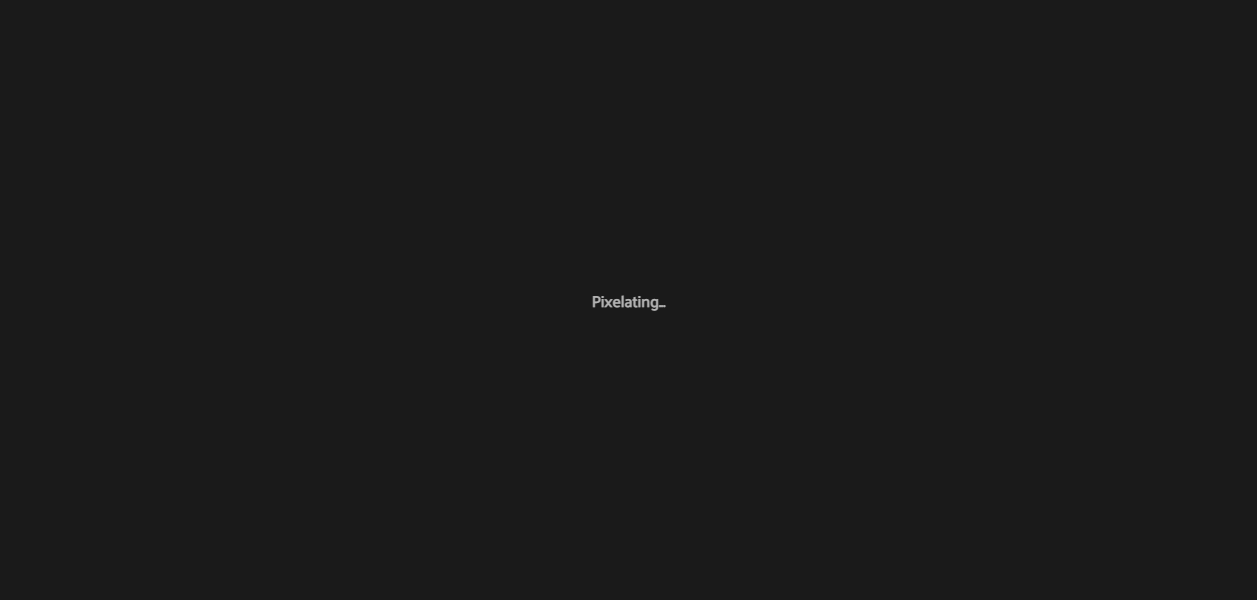

<IPython.core.display.Javascript object>

In [ ]:
eval_patches = predictions_view_voc2012.to_evaluation_patches("eval")
print(eval_patches)

print(eval_patches.count_values("type"))

session.view = eval_patches

In [ ]:
session.freeze()  # screenshot the active App for sharing

# mAP of this model on VOC 2012

In [ ]:
print(results_voc2012.mAP())

0.3161495509323367


# Getting the 5 most common classes 

In [ ]:
# Get the 5 most common classes in the dataset
counts = dataset_voc2012.count_values("ground_truth.detections.label")
classes_top5 = sorted(counts, key=counts.get, reverse=True)[:5]

# Print a classification report for the top-10 classes
results_voc2012.print_report(classes=classes_top5)

              precision    recall  f1-score   support

      person       0.30      0.80      0.44      5110
       chair       0.21      0.67      0.32      1449
         car       0.26      0.70      0.37      1173
         dog       0.47      0.88      0.62       773
      bottle       0.18      0.49      0.27       733

   micro avg       0.28      0.75      0.40      9238
   macro avg       0.28      0.71      0.40      9238
weighted avg       0.28      0.75      0.41      9238



# Precision vs. recall of th 5 most common classes

In [ ]:
plot = results_voc2012.plot_pr_curves(classes=classes_top5)
plot.show()

# Confusion matrix for the 5 most common classes

In [ ]:
plot = results_voc2012.plot_confusion_matrix(classes=classes_top5)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Printing a classification report for all 20 classes

In [ ]:
counts = dataset_voc2012.count_values("ground_truth.detections.label")
classes_20 = sorted(counts, key=counts.get, reverse=True)[:20]

results_voc2012.print_report(classes=classes_20)

              precision    recall  f1-score   support

      person       0.30      0.80      0.44      5110
       chair       0.21      0.67      0.32      1449
         car       0.26      0.70      0.37      1173
         dog       0.47      0.88      0.62       773
      bottle       0.18      0.49      0.27       733
        bird       0.34      0.73      0.46       629
         cat       0.54      0.93      0.69       618
 pottedplant       0.00      0.00      0.00       542
        boat       0.20      0.60      0.30       491
       sheep       0.37      0.73      0.49       485
   aeroplane       0.00      0.00      0.00       484
   tvmonitor       0.00      0.00      0.00       414
        sofa       0.00      0.00      0.00       387
     bicycle       0.38      0.82      0.52       380
   motorbike       0.00      0.00      0.00       376
 diningtable       0.00      0.00      0.00       374
       horse       0.44      0.88      0.59       373
         cow       0.32    

# Confusion matrix for all the 20 classes

In [ ]:
plot = results_voc2012.plot_confusion_matrix(classes=classes_20)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Success cases

In [ ]:
# Only contains detections with confidence >= 0.75
success_view_voc2012 = predictions_view_voc2012.filter_labels("faster_rcnn_mobilenet", F("confidence") > 0.75, only_matches=False)

In [ ]:
# Print some information about the view
print(success_view_voc2012)

Dataset:     voc-2012-validation
Media type:  image
Num samples: 5823
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5823, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [ ]:
session.view = success_view_voc2012

In [ ]:
session.freeze()  # screenshot the active App for sharing

# Failure cases

In [ ]:
# Only contains detections with confidence <= 0.3
failure_view_voc2012 = predictions_view_voc2012.filter_labels("faster_rcnn_mobilenet", F("confidence") <= 0.3, only_matches=False)

In [ ]:
# Print some information about the view
print(failure_view_voc2012)

Dataset:     voc-2012-validation
Media type:  image
Num samples: 5823
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5823, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$lte': ['$$this.confidence', 0.3]}, only_matches=False, trajectories=False)


In [ ]:
session.view = failure_view_voc2012

In [ ]:
session.freeze()  # screenshot the active App for sharing